In [113]:

from jyquickhelper import add_notebook_menu
add_notebook_menu()

Sapountzi Athanasia Despoina   

AEM 02624

# Learning Trees : Advantage and Challenges

- **Advantages of tree-based methods**
    - Highly accurate: almost half of data science challenges are won by tree based methods.
    - Easy to use: invariant to input scale, get good performance with little tuning.
    - Easy to interpret and control
- **Challenges on learning tree**
    - Control over-fitting
    - Improve training speed and scale up to larger dataset

## Gradient Boosting

This notebook explores the [Gradient Boosting] algorithm (https://en.wikipedia.org/wiki/Gradient_boosting). Read the book with code that I will upload in piazza.

# What is XGBoost
- A Scalable System for Learning Tree Ensembles
    o Model improvement
        - Regularized objective for better model
    o Systems optimizations
        - Out of core computing
        - Parallelization
        - Cache optimization
        - Distributed computing
    o Algorithm improvements
        - Sparse aware algorithm
        - Weighted approximate quantile sketch.
 - In short, faster tool for learning better models
 
 ![](perf_xgb.png)

## Lab exercise 

\begin{exercise}
Gradient boosting algorithms are considered important alternatives to neural nets (to be discussed next) for solving classification and regression problems. You are supposed to read the concept of gradient boosting discussed in this notebook and the related lecture that I have posted. The main example in this notebook studies the gradient based algorithms for regression problem implemented utilizing sklearn and other libraries. In this lab you are supposed to modify the main example to solve the classification problem for the pima-indian-diabetes dataset utilizing the `diabetes.csv` dataset and study the effect of various parameters as it is done in the regression example presented here. You should modify the comments presented after each experiment. 

**You can do this lab with your team provided you keep safe distance**

\end{exercise}


In [115]:
import numpy as np # linear algebra
import pandas as pd # data processing



dataset = pd.read_csv('diabetes.csv')

#code below the main example is modified to solve the dataset

# BIAS VARIANCE TRADE-OFF

## Supervised Learning
- $\bf {y = f(x)}$, $\bf f$ is the function which is unknown
- Our model output will be that function
- But that function may contains various type of error like noise

## Goals of Supervised Learning
- Find a model $\bf {f1}$ that best approximates $\bf {f: f1 ≈ f ()}$
- $\bf {f1}$ can be LogisticRegression, Decision Tree, Neural Network ...
- Discard noise as much as possible.
- End goal:$\bf {f1}$ should achieve a low predictive error on unseen datasets.

## Dificulties in Approximating f
- Overtting: $\bf {f1(x)}$ fits the training set noise.
- Undertting: $\bf {f1}$ is not flexible enough to approximate $\bf f$

## Generalization error 
- Generalization Error of $\bf {f1}$ : Does $\bf {f1}$ generalize well on unseen data?
- It can be decomposed as follows: Generalization Error of $ \bf {f1 = bias + variance + irreducible \; error}$

## Bias
- Bias: error term that tells you, on average, how much f1 ≠ f.
- High Bias lead to underfitting

## Variance
- Variance: tells you how much f is inconsistent over different training sets.
- High Variance lead to overfitting

- If we decrease Bias then Variance increase. Or Vice versa.

## Model Complexity
- Model Complexity: sets the flexibility of f1.
- Example: Maximum tree depth, Minimum samples per leaf etc etc.

## Bias Variance Trade-off 
- It is the problem is in trying to simultaneously minimize these two sources of error that prevent supervised learning algorithms from generalizing beyond their training set.

## Estimating the Generalization Error, Solution:
- Split the data to training and test sets 
- Fit $\bf {f1}$ to the training set
- Evaluate the error of $\bf {f1}$ on the unseen test set
- Generalization error of $ \bf {f1 ≈ test \; set\; error\; of \; f1}$.

## Better Model Evaluation with Cross-Validation
- Test set should not be touched until we are confident about $\bf {f1}$'s performance.
- Evaluating $\bf {f1}$ on training set: biased estimate, $\bf {f1}$ has already seen all training points.
- Solution → K Cross-Validation (CV)

## Diagnose Variance Problems

- If $\bf {f1}$ suffers from high variance: CV error of $\bf {f1}$ > training set error of $\bf {f1}$.
- $\bf {f1} is said to overfit the training set. To remedy overfitting:
    - decrease model complexity
    - for ex: decrease max depth, increase min samples per leaf
    - gather more data

## Diagnose Bias Problems

- If $\bf {f1}$ suffers from high bias: CV error of $\bf {f1 ≈}$ training set error of $\bf {f1}$  >> desired error.
- $\bf {f1}$ is said to underfit the training set. To remedy underfitting:
    - increase model complexity
    - for ex: increase max depth, decrease min samples per leaf
    - gather more relevant features

## Limitations of CARTs
- Classification: can only produce orthogonal decision boundaries.
- Sensitive to small variations in the training set.
- High variance: unconstrained CARTs may overt the training set.
- Solution: ensemble learning.

## Ensemble Learning
- Train different models on the same dataset.
- Let each model make its predictions.
- Meta-model: aggregates predictions of individual models.
- Final prediction: more robust and less prone to errors.
- Best results: models are skillful in different ways.

## Steps in Ensemble learning 
1. Training set is fed to different classifier like Decision tree, Logistic regression, KNN etc.
2. Each classifier learn its parameter and make prediction
3. Each prediction are fed into another model and that model make final prediction.
4. That final model is known as ensemble model.

## Bias/Variance Tradeoff Methods

- Ensemble methods that minimize variance
    - Bagging
    - Random Forests
- Ensemble methods that minimize bias
    - Functional Gradient Descent
    - Boosting
    - Ensemble Selection

# Bagging and Randomised Trees
other classifier combinations:

## Bagging:
combine trees grown from "bootstrap" samples
(i.e re-sample training data with replacement)

\begin{definition}
The **bootstrap method** is a _resampling_ technique used to estimate statistics on a population by sampling a dataset with replacement.
\end{definition}


## Randomised Trees: (Random Forest: trademark L.Breiman, A.Cutler)
combine trees grown with:
random bootstrap (or subsets) of the training data only
consider at each node only a random subsets of variables for the split
NO Pruning!
These combined classifiers work surprisingly well, are very stable and almost perfect "out of the box" classifiers

# Regression Tree (CART) Example
![](cart1.png)

# Random Forest Tree
![](forest.png)

## Gradient Boosting Concept

The primary weakness of **decision trees** is that they don't tend to have the best predictive accuracy. This is partially because of **high variance**, meaning that different splits in the training data can lead to very different trees.

**Bagging** is a general-purpose procedure for reducing the variance of a machine learning method but is particularly useful for decision trees. 

**Boosting algorithms** play a crucial role in dealing with **bias variance trade-off**.  

* Unlike **bagging algorithms**, which only controls for **high variance in a model**. 
* **boosting** controls both the aspects **(bias & variance)**, and is considered to be more effective. 

A sincere **understanding of GBM** here should give you much needed **confidence to deal with such critical issues.**

### Table of Contents

* How Boosting Works?
* Understanding GBM Parameters
* Tuning Parameters (with Example)

### How Boosting Works?

depuis l'importation jyquickhelper ajouter le menu _bloc-notes_
ajouter le menu _bloc-notes_ ()

<p style="text-align: justify;">Boosting is a sequential technique which works on the principle of <strong>ensemble</strong>. It combines a set of <strong>weak learners</strong> and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. This technique is followed for a classification problem while a similar technique is used for regression.</p>
<p>Let&#8217;s understand it visually:</p>
<p><a href="https://www.analyticsvidhya.com/wp-content/uploads/2016/02/boosting.png" rel="attachment wp-att-23451"><img class="size-full wp-image-23451 aligncenter" src="https://www.analyticsvidhya.com/wp-content/uploads/2016/02/boosting.png" alt="boosting" width="536" height="181" srcset="https://www.analyticsvidhya.com/wp-content/uploads/2016/02/boosting.png 536w, https://www.analyticsvidhya.com/wp-content/uploads/2016/02/boosting-300x101.png 300w" sizes="(max-width: 536px) 100vw, 536px" /></a></p>
<p>Observations:</p>
<ol>
<li><strong>Box 1: Output of First Weak Learner (From the left)</strong>
<ul>
<li style="text-align: justify;">Initially all points have same weight (denoted by their size).</li>
<li style="text-align: justify;">The decision boundary predicts 2 +ve and 5 -ve points correctly.</li>
</ul>
</li>
<li><strong>Box 2: Output of Second Weak Learner</strong>
<ul>
<li style="text-align: justify;">The points classified correctly in box 1 are given a lower weight and vice versa.</li>
<li>The model focuses on high weight points now and classifies them correctly. But, others are misclassified now.</li>
</ul>
</li>
</ol>
<p style="text-align: justify;">Similar trend can be seen in box 3 as well. This continues for many iterations. In the end, all models are given a weight depending on their accuracy and a consolidated result is generated.</p>
<p>Refer to these articles (focus on GBM right now):</p>
<ul>
<li><a href="https://www.analyticsvidhya.com/blog/2015/09/complete-guide-boosting-methods/" target="_blank">Learn Gradient Boosting Algorithm for better predictions (with codes in R)</a></li>
<li><a href="https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/" target="_blank">Quick Introduction to Boosting Algorithms in Machine Learning</a></li>
<li><a href="https://www.analyticsvidhya.com/blog/2015/05/boosting-algorithms-simplified/" target="_blank">Getting smart with Machine Learning – AdaBoost and Gradient Boost</a></li>
</ul>

***
![](boosting.png)

![](adaboost.png)

![](adaboost1.png)

**Question 1**: [What is Weak Learner? ](https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/)  
***
- The term 'Boosting' refers to a family of algorithms which converts weak learner to strong learners.
- Let's understand this definition in detail by solving a problem of spam email identification:
- How would you classify an email as SPAM or not? Like everyone else, our initial approach would be to identify 'spam' and 'not spam' emails using following criteria. If:

    - Email has only one image file (promotional image), It's a SPAM
    - Email has only link(s), It's a SPAM
    - Email body consist of sentence like "You won a prize money of \$ xxxxxx", It's a SPAM
    - Email from our official domain “metu.edu.tr", Not a SPAM Email from known source, Not a SPAM
    
- Above, we've defined multiple rules to classify an email into 'spam' or 'not spam'. But, do you think these rules individually are strong enough to successfully classify an email? No.
- Individually, these rules are not powerful enough to classify an email into 'spam' or 'not spam'. Therefore, these rules are called as weak learner.

**Question 2**: [How boosting identify weak rules?](https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/)  
**Answer 2**: To find weak rule, we apply base learning (ML) algorithms with a different distribution of the training data. Each time base learning algorithm is applied, it generates a new weak prediction rule. This is an iterative process. After many iterations, the boosting algorithm combines these weak rules into a single strong prediction rule.
***
**Question 3**: [How do we choose different distribution of training data for each round?’](https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/)  
**Answer 3**: here are the following steps:

Step 1:  The base learner takes all the training data  and assign equal weight or attention to each observation.

Step 2: If there is any prediction error caused by first base learning algorithm, then we pay higher attention to observations having prediction error. Then, we apply the next base learning algorithm.

Step 3: Iterate Step 2 till the limit of base learning algorithm is reached or higher accuracy is achieved.

Finally, it combines the outputs from weak learner and creates  a strong learner which eventually improves the prediction power of the model. Boosting pays higher focus on examples which are mis-classiﬁed or have higher errors by preceding weak rules.
***

## Gradient Boosting for Regression

You are given $\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \ldots,\left(x_{n}, y_{n}\right),$ and the task is to fit a model $F(x)$ to minimize square loss. 

Suppose your friend wants to help you and gives you a model $F$. 

You check his model and find the model is good but not perfect. 

There are some mistakes: $F\left(x_{1}\right)=0.8,$ while $y_{1}=0.9,$ and $F\left(x_{2}\right)=1.4$ while $y_{2}=1.3 \ldots$ How can you improve this model? 

**Rule of the game**:

   -  You are not allowed to remove anything from $F$ or change any parameter in $F$. 
   -  You can add an additional model (regression tree) $h$ to $F,$ so the new prediction will be $F(x)+h(x)$

### Simple solution:
Or, equivalently, you wish
$$
\begin{array}{l}
h\left(x_{1}\right)=y_{1}-F\left(x_{1}\right) \\
h\left(x_{2}\right)=y_{2}-F\left(x_{2}\right) \\
\cdots \\
h\left(x_{n}\right)=y_{n}-F\left(x_{n}\right)
\end{array}
$$

**Can any regression tree $h$ achieve this goal perfectly? **

Maybe not.... 

**But some regression tree might be able to do this approximately. 

How? 

Just fit a regression tree $h$ to data $\left(x_{1}, y_{1}-F\left(x_{1}\right)\right),\left(x_{2}, y_{2}-F\left(x_{2}\right)\right), \ldots,\left(x_{n}, y_{n}-F\left(x_{n}\right)\right)$
Congratulations, you get a better model!


### Simple solution:

$y_{i}-F\left(x_{i}\right)$ are called residuals. These are the parts that existing model $F$ cannot do well.

The role of $h$ is to compensate the shortcoming of existing model $F$

If the new model $F+h$ is still not satisfactory, we can add another regression tree... 

We are improving the predictions of training data, is the procedure also useful for test data? 

Yes! Because we are building a model, and the model can be applied to test data as well. 

How is this related to gradient descent?

### Gradient Descent 

Minimize a function by moving in the opposite direction of the gradient.
$$
\theta_{i}:=\theta_{i}-\rho \frac{\partial J}{\partial \theta_{i}}
$$

**How is this related to gradient descent?** 

For regression with **square loss**,

   - residual $\Leftrightarrow$ negative gradient

   - fit $h$ to residual $\Leftrightarrow$ fit $h$ to negative gradient

   - update $F$ based on residual $\Leftrightarrow$ update $F$ based on negative gradient

So we are actually updating our model using **gradient descent**!

It turns out that the concept of gradients is more general and
useful than the concept of residuals. So from now on, let's stick
with gradients. The reason will be explained later.

**Regression with square Loss** 

Let us summarize the algorithm we just derived using the concept of gradients. Negative gradient:
$$
-g\left(x_{i}\right)=-\frac{\partial L\left(y_{i}, F\left(x_{i}\right)\right)}{\partial F\left(x_{i}\right)}=y_{i}-F\left(x_{i}\right)
$$
start with an initial model, say, $F(x)=\frac{\sum_{i=1}^{n} y_{i}}{n}$ iterate until converge: 

   - calculate negative gradients $-g\left(x_{i}\right)$
    
   - fit a regression tree $h$ to negative gradients 
    $-g\left(x_{i}\right)$ 
   - $F:=F+\rho h,$ where $\rho=1$
   
The benefit of formulating this algorithm using gradients is that it
allows us to consider other loss functions and derive the
corresponding algorithms in the same way.

### The algorithm

#### Inspiration


The algorithm is inspired by the gradient descent algorithm. We consider a real function $f(x)$ and we calculate the gradient $\frac{\partial f}{\partial x}(x)$ to build a sequence:

$$x_{t+1} = x_t - \epsilon_t \frac{\partial f}{\partial x}(x_t)$$

The $(x_t)$ sequence converges to the minimum of the $f$ function. We apply this to an error function from a regression problem.

$$f(x) = \sum_{n=1}^N l(F(X_i), y_i)$$

Most often, we apply this method to a function $F$ which depends on a parameter $\theta$

$$f(\theta, x) = \sum_{n=1}^N l(F(\theta, X_i), y_i)$$

And it is the sequence $\theta_{t+1} = \theta_t - \epsilon_t \frac{\partial f}{\partial \theta}(\theta_t)$ which converges towards the minimum of the function $f$ so that the function $f(\theta, x)$ approximates the points $(X_i, y_i)$ at best. But, we could quite solve this problem in a space of functions and not a space of parameters:

$$G_{t+1} = G_t - \epsilon_t \frac{\partial f}{\partial G}(G_t)$$

The $\frac{\partial f}{\partial G}$ gradient is easy to calculate since it does not depend on $G$. We could therefore construct the regression function $G$ as an additive sequence of functions $F_k \sim - \epsilon_t \frac{\partial f}{\partial G}(G_t)$.

$$G_t = \sum_{k=1}^t F_k$$

And we could construct the function $F_k$ as a solution to a regression problem defined by the pairs $(X_i, z_i)$ with:

$$\begin{array}{rcl} z_i &=& - \epsilon_t \frac{\partial f}{\partial G}(G_t(X_i), y_i) \\ f(X_i, y_i) &=& l(G_t(X_i), y_i)\end{array}$$

That's the idea.

#### Algorithm

I resume here the wikipedia page. We are looking to build a model that minimizes the $L(y,F(x)) = \sum_{i=1}^n l(y_i, F(X_i))$ error. We note $r$ the learning rate.

**Step 1:** we wedge a first regression model, here, simply a constant, by optimizing $F_0(x) = \arg \min_\gamma \sum_{i=1}^n L(y_i, \gamma)$. $F_0(x)$ is a constant.

We then write $F_m(x) = \gamma_0 \sum_{k=1}^m r \gamma_k h_k(x)$ where $\gamma_0$ is the constant function to be constructed during the first step.

**Step 2:** we then calculate the $e_{im} = l(y_i, F_m(x_i))$ errors and the opposite of the $r_{im} = - \left[ \frac{\partial l(y_i, F_m(x_i)) }{\partial F_m(x_i)} \right]$ gradient

**Step 3:** we choose the function $h_{m+1}(x)$ so that it approximates the residues $r_{im}$ as well as possible.

**Step 4:** we choose the coefficient $\gamma_{m+1}$ so that it minimizes the expression $\min_\gamma \sum_{i=1}^n l\left(y_i, \gamma_0 + \sum_{k=1}^m r \gamma_k h_k(x_i) + \gamma h_{m+1}(x_i)\right)$.

We return step 2 as many times as there are iterations. When the error is a quadratic error $l(y, F(x)) = (y-F(x))^2$, the residuals become $r_{im} = -2 (y_i - F_m(x_i))$. Consequently, the $h$ function approximates at best what is missing to reach the objective. A learning rate equal to 1 means that the sum of the predictions of each $h_m$ function oscillates around the true value, a low value gives the impression of a function that converges in small steps, a large value increases the amplitude of the oscillations at point to prevent the algorithm from converging.

We also see that the algorithm is first interested in the points where the gradient is the strongest, therefore in principle the largest errors.

### First example

We consider the default settings of the [GradientBoostingRegressor] class (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor).

In [116]:
%matplotlib inline

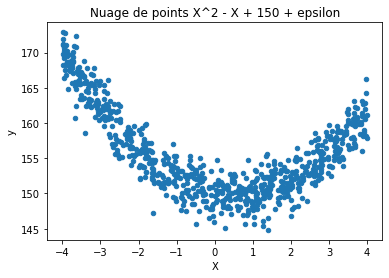

In [117]:
from numpy.random import randn, random
from pandas import DataFrame
from sklearn.model_selection import train_test_split
rnd = randn(1000)
X = random(1000) * 8 - 4
y = X ** 2 - X + rnd * 2 + 150 # X^2 - X + 150 + epsilon
X = X.reshape((-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train1 = X_train; X_test1 = X_test; y_train1 = y_train; y_test1 = y_test
df = DataFrame({'X': X_train.ravel(), 'y': y_train})
ax = df.plot(x='X', y='y', kind='scatter')
ax.set_title("Nuage de points X^2 - X + 150 + epsilon");

In [118]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(max_depth=1)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1)

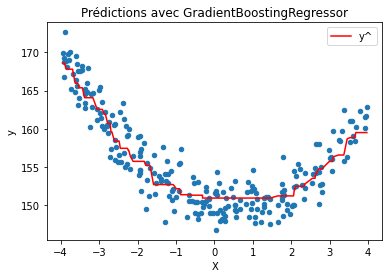

In [119]:
import numpy
ind = numpy.argsort(X_test, axis=0)
y_ = model.predict(X_test)
df = DataFrame({'X': X_test[ind].ravel(), 
                'y': y_test[ind].ravel(),
                'y^': y_[ind].ravel()})
ax = df.plot(x='X', y='y', kind='scatter')
df.plot(x='X', y='y^', kind='line', ax=ax, color="r")
ax.set_title("Prédictions avec GradientBoostingRegressor");

Nothing unexpected so far. Let's try something else. We look with a single iteration.

In [120]:
model = GradientBoostingRegressor(max_depth=1, n_estimators=1, learning_rate=0.5)
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=1, n_estimators=1)

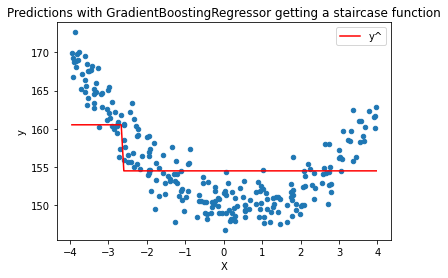

In [121]:
y_ = model.predict(X_test)
df = DataFrame({'X': X_test[ind].ravel(), 
                'y': y_test[ind].ravel(),
                'y^': y_[ind].ravel()})
ax = df.plot(x='X', y='y', kind='scatter')
df.plot(x='X', y='y^', kind='line', ax=ax, color="r")
ax.set_title("Predictions with GradientBoostingRegressor getting a staircase function");

Let us try to show the evolution of the predicted curve as a function of the number of steps and return to 100 estimators.

In [122]:
model = GradientBoostingRegressor(max_depth=1)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1)

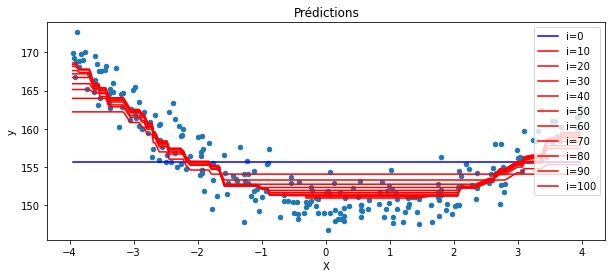

In [123]:
for i in range(0, model.estimators_.shape[0] + 1, 10):
    if i == 0:
        df = DataFrame({'X': X_test[ind].ravel(),
                        'y': y_test[ind].ravel()})
        ax = df.plot(x='X', y='y', kind='scatter', figsize=(10, 4))
        y_ = model.init_.predict(X_test)
        color = 'b'
    else:
        y_ = sum([model.init_.predict(X_test)] + 
                 [model.estimators_[k, 0].predict(X_test) * model.learning_rate
                  for k in range(0, i)])
        color = 'r'
    df = DataFrame({'X': X_test[ind].ravel(),
                    'y^': y_[ind].ravel()})
    df.plot(x='X', y='y^', kind='line', ax=ax, color=color, label='i=%d' % i)
ax.set_title("Prédictions");

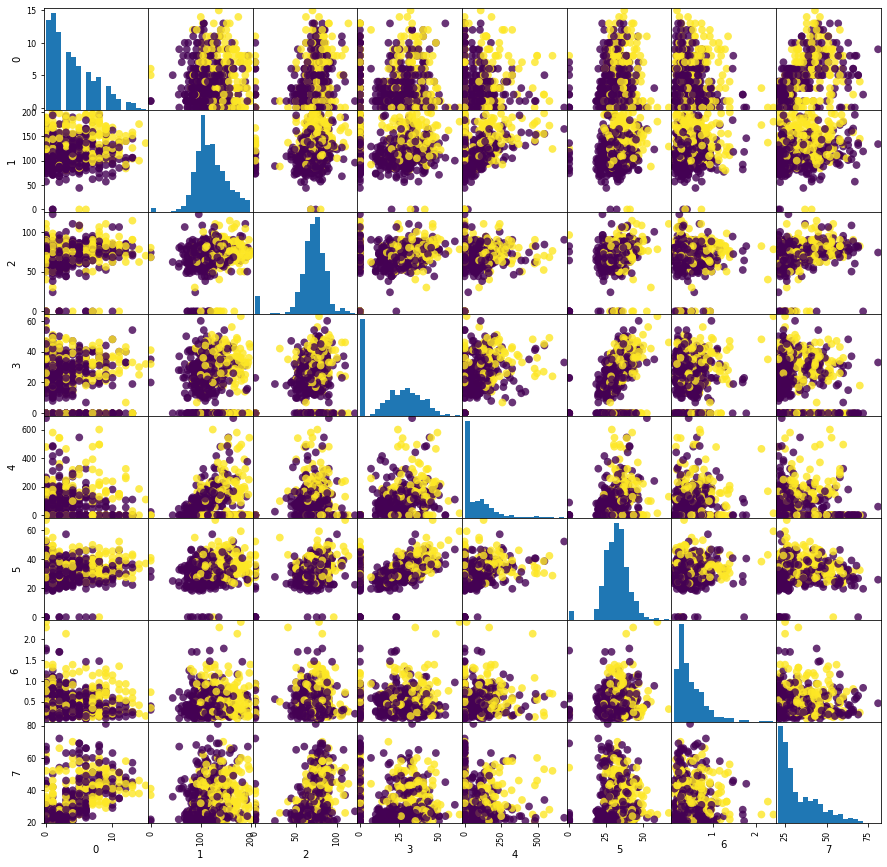

In [124]:
from numpy.random import randn, random
from pandas import DataFrame
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values  #set y as the outcome variable

#split and train the data
X_train, X_test, y_train, y_test = train_test_split(X, y)
# X_train.ravel()
df = DataFrame(X_train)

# Create a scatter matrix from the dataframe, color by y_train
a =pd.plotting.scatter_matrix(df, c=y_train, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)



In [125]:
from tqdm import tqdm

def experiment(models, tries=25):
    scores = []
    for _ in tqdm(range(tries)):
        X = dataset.iloc[:, :-1].values
        y = dataset.iloc[:, -1].values
#         X = X.reshape((-1, 1)) #?
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        scs = []
        for model in models:
            model.fit(X_train, y_train)
            sc = model.score(X_test, y_test)
            scs.append(sc)
        scores.append(scs)
    return scores



In [126]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(max_depth=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test) 
# y_prob = model.predict_proba(X_test)[:,1] #needs extra lib

100%|██████████| 25/25 [00:01<00:00, 17.04it/s]


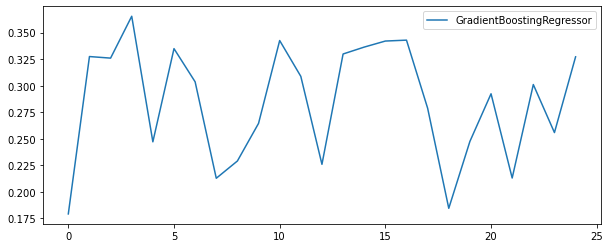

In [127]:
 scores = experiment([
    GradientBoostingRegressor(max_depth=1)
])
scores[:1]
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot([_[0] for _ in scores], label="GradientBoostingRegressor")
ax.legend();

Nothing unexpected so far. Let's try something else. We look with a single iteration.

100%|██████████| 25/25 [00:00<00:00, 266.66it/s]


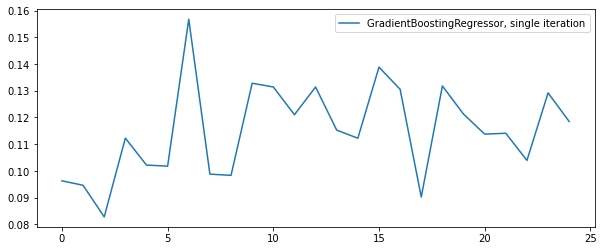

In [128]:
scores = experiment([
    GradientBoostingRegressor(max_depth=1, n_estimators=1, learning_rate=0.5)
])
scores[:1]
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot([_[0] for _ in scores], label="GradientBoostingRegressor, single iteration")
ax.legend();

model = GradientBoostingRegressor (max _depth = 1, n_ estimators = 1, learning _rate = 0.5)
model.fit (X_ train, y_train)

### Learning rate and iterations

And if we chose a *learning_rate*, smaller or larger ...

In [129]:
model01 = GradientBoostingRegressor(max_depth=1, learning_rate=0.01)
model01.fit(X_train1, y_train1)
modela = GradientBoostingRegressor(max_depth=1, learning_rate=1.2)
modela.fit(X_train1, y_train1)
modelb = GradientBoostingRegressor(max_depth=1, learning_rate=1.99)
modelb.fit(X_train1, y_train1)

GradientBoostingRegressor(learning_rate=1.99, max_depth=1)

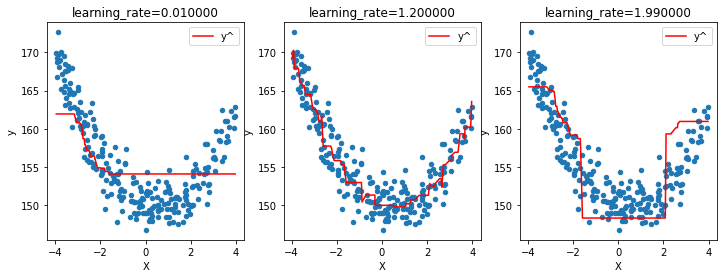

In [130]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ind = numpy.argsort(X_test1, axis=0)

for i, mod in enumerate([model01, modela, modelb]):
    df = DataFrame({'X': X_test1[ind].ravel(), 
                    'y': y_test1[ind].ravel(),
                    'y^': mod.predict(X_test1)[ind].ravel()})
    df.plot(x='X', y='y', kind='scatter', ax=ax[i])
    df.plot(x='X', y='y^', kind='line', ax=ax[i], color="r")
    ax[i].set_title("learning_rate=%f" % mod.learning_rate);

100%|██████████| 25/25 [00:04<00:00,  5.78it/s]


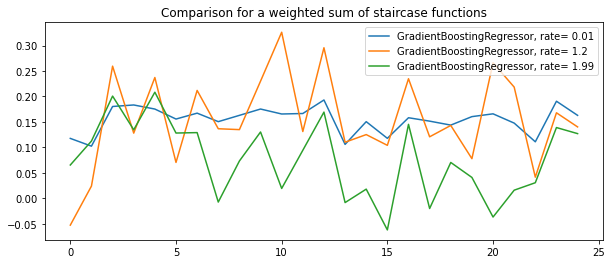

In [131]:
scores = experiment([
    GradientBoostingRegressor(max_depth=1, learning_rate=0.01),
    GradientBoostingRegressor(max_depth=1, learning_rate=1.2),
    GradientBoostingRegressor(max_depth=1, learning_rate=1.99)   
])
scores[:1]
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot([_[0] for _ in scores], label="GradientBoostingRegressor, rate= 0.01")
ax.plot([_[1] for _ in scores], label="GradientBoostingRegressor, rate= 1.2")
ax.plot([_[2] for _ in scores], label="GradientBoostingRegressor, rate= 1.99")
ax.set_title("Comparison for a weighted sum of staircase functions")

ax.legend();

Too low a value of *learning_rate* seems to retain the model of converging, a large value produces unpredictable effects. To understand why, we need to understand the details the algorithm.

### Quantile regression

Ordinary least square regression is one of the most widely used statistical methods. However, it is a parametric model and relies on assumptions that are often not met. Quantile regression makes no assumptions about the distribution of the residuals. It also lets you explore different aspects of the relationship between the dependent variable and the independent variables.

In this case, the quadratic error is replaced by an error in absolute value. The residuals in this case are equal to -1 or 1.


In OLS, we minimize the sum of squared errors:

$$
\sum u_{i}^{2}=\sum\left(Y_{i}-B_{1}-B_{2} X\right)^{2}
$$

In QRM, we minimize the absolute sum of errors:
$$
\sum\left|u_{i}\right|=\sum\left|Y_{i}-B_{1}-B_{2} X_{i}\right|
$$

In [132]:
alpha = 0.5
model = GradientBoostingRegressor(alpha=alpha, loss='quantile', max_depth=1, learning_rate=0.1)
model.fit(X_train1, y_train1)
model01 = GradientBoostingRegressor(alpha=alpha, loss='quantile', max_depth=1, learning_rate=0.01)
model01.fit(X_train1, y_train1)
modela = GradientBoostingRegressor(alpha=alpha, loss='quantile', max_depth=1, learning_rate=1.2)
modela.fit(X_train1, y_train1)
modelb = GradientBoostingRegressor(alpha=alpha, loss='quantile', max_depth=1, learning_rate=1.99)
modelb.fit(X_train1, y_train1)
modelc = GradientBoostingRegressor(alpha=alpha, loss='quantile', max_depth=1, learning_rate=2.01)
modelc.fit(X_train1, y_train1)

GradientBoostingRegressor(alpha=0.5, learning_rate=2.01, loss='quantile',
                          max_depth=1)

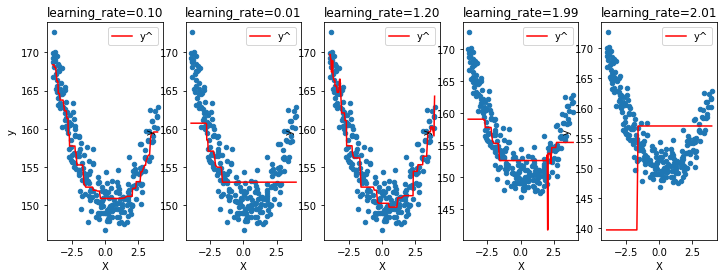

In [133]:
fig, ax = plt.subplots(1, 5, figsize=(12, 4))
ind = numpy.argsort(X_test1, axis=0)

for i, mod in enumerate([model, model01, modela, modelb, modelc]):
    df = DataFrame({'X': X_test1[ind].ravel(), 
                    'y': y_test1[ind].ravel(),
                    'y^': mod.predict(X_test1)[ind].ravel()})
    df.plot(x='X', y='y', kind='scatter', ax=ax[i])
    df.plot(x='X', y='y^', kind='line', ax=ax[i], color="r")
    ax[i].set_title("learning_rate=%1.2f" % mod.learning_rate);

Concretely, the parameter *max_depth = 1* corresponds to a simple $f(x) = \mathbb{1}_{x > s}$ function and the final model is a weighted sum of indicator functions.

100%|██████████| 25/25 [00:19<00:00,  1.30it/s]


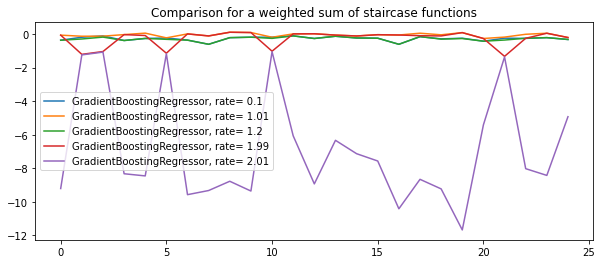

In [134]:
scores = experiment([
    GradientBoostingRegressor(alpha=alpha, loss='quantile', max_depth=1, learning_rate=0.1),
    GradientBoostingRegressor(alpha=alpha, loss='quantile', max_depth=1, learning_rate=0.01),
    GradientBoostingRegressor(alpha=alpha, loss='quantile', max_depth=1, learning_rate=1.2),
    GradientBoostingRegressor(alpha=alpha, loss='quantile', max_depth=1, learning_rate=1.99),
    GradientBoostingRegressor(alpha=alpha, loss='quantile', max_depth=1, learning_rate=2.01)  
])
scores[:5]
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot([_[0] for _ in scores], label="GradientBoostingRegressor, rate= 0.1")
ax.plot([_[1] for _ in scores], label="GradientBoostingRegressor, rate= 1.01")
ax.plot([_[2] for _ in scores], label="GradientBoostingRegressor, rate= 1.2")
ax.plot([_[3] for _ in scores], label="GradientBoostingRegressor, rate= 1.99")
ax.plot([_[4] for _ in scores], label="GradientBoostingRegressor, rate= 2.01")
ax.set_title("Comparison for a weighted sum of staircase functions")

ax.legend();

### Learning rate and overfitting - comparison of GradientBoostingRegressor with RandomForestRegressor

In [140]:
import numpy as np # linear algebra
import pandas as pd # data processing



dataset = pd.read_csv('diabetes.csv')

#code below the main example is modified to solve the dataset

In [148]:
##New def experiment. Modified version of experiment to produce score from dataset
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm

def experiment(models, tries=25):
    scores = []
    for _ in tqdm(range(tries)):
        X = dataset.iloc[:, :-1].values
        y = dataset.iloc[:, -1].values
#         X = X.reshape((-1, 1)) #?
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        scs = []
        for model in models:
            model.fit(X_train, y_train)
            sc = model.score(X_test, y_test)
            scs.append(sc)
        scores.append(scs)
    return scores

scores = experiment([
    GradientBoostingRegressor(max_depth=1, n_estimators=100),
    RandomForestRegressor(max_depth=1, n_estimators=100)
])
scores[:3]

100%|██████████| 25/25 [00:05<00:00,  4.57it/s]


[[0.27725193518192603, 0.17917827077547388],
 [0.30918707323195427, 0.16414998575132933],
 [0.269460094499399, 0.16073071697608265]]

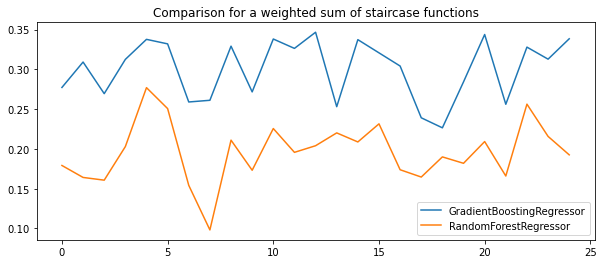

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot([_[0] for _ in scores], label="GradientBoostingRegressor")
ax.plot([_[1] for _ in scores], label="RandomForestRegressor")
ax.set_title("Comparison for a weighted sum of staircase functions")
ax.legend();

This result is expected because the random forest is an average of a regression model all learned under the same conditions while the boosting gradient is interested in the error after the sum of the first regressors. Let us see with decision trees and no longer staircase functions.

In [150]:
from sklearn.tree import DecisionTreeRegressor

scores = experiment([
    GradientBoostingRegressor(max_depth=5, n_estimators=100),
    RandomForestRegressor(max_depth=5, n_estimators=100),
    DecisionTreeRegressor(max_depth=5)
])

100%|██████████| 25/25 [00:09<00:00,  2.62it/s]


Comparaison pour une somme pondérée d'arbres de décisions

Comparison for a weighted sum of decision trees

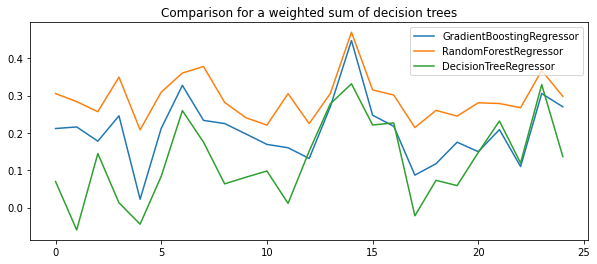

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot([_[0] for _ in scores], label="GradientBoostingRegressor")
ax.plot([_[1] for _ in scores], label="RandomForestRegressor")
ax.plot([_[2] for _ in scores], label="DecisionTreeRegressor")
ax.set_title("Comparison for a weighted sum of decision trees")
ax.legend();

From observing the above plot random forest is the best model for solving the pima dataset. GradientBoostingRegressor preforms a lot worse than random forest but slightly better than Decision Tree. The Decision Tree model has the worst performance out of all the the models for solving the pima dataset.

In [152]:
scores = experiment([
    RandomForestRegressor(max_depth=5, n_estimators=100),
    GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.05),
    GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1),
    GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.2),
])
scores[:2]

100%|██████████| 25/25 [00:18<00:00,  1.33it/s]


[[0.10071961727327661,
  0.06881698776983858,
  0.03063416215618553,
  -0.05561002134512605],
 [0.16155198962355544,
  0.10619960042937349,
  0.057153685540654364,
  -0.017099612439431144]]

Comparison for various learning rates are displayed below.

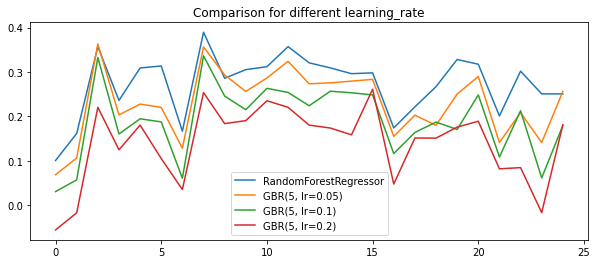

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot([_[0] for _ in scores], label="RandomForestRegressor")
ax.plot([_[1] for _ in scores], label="GBR(5, lr=0.05)")
ax.plot([_[2] for _ in scores], label="GBR(5, lr=0.1)")
ax.plot([_[3] for _ in scores], label="GBR(5, lr=0.2)")
ax.set_title("Comparison for different learning_rate")
ax.legend();

Decreasing *learning_rate* is clearly a way to avoid over-learning, but the previous graphs have shown that more iterations are needed when the learning rate is small.

In [154]:
scores = experiment([
    RandomForestRegressor(max_depth=5, n_estimators=100),
    GradientBoostingRegressor(max_depth=1, n_estimators=100, learning_rate=0.05),
    GradientBoostingRegressor(max_depth=1, n_estimators=100, learning_rate=0.1),
    GradientBoostingRegressor(max_depth=1, n_estimators=100, learning_rate=0.2),
])
scores[:2]

100%|██████████| 25/25 [00:10<00:00,  2.31it/s]


[[0.27008330860073526,
  0.2309099771251094,
  0.2353559824683258,
  0.22908161845186126],
 [0.25654809203410267,
  0.25400372519870007,
  0.2580964603462509,
  0.2561228712512317]]

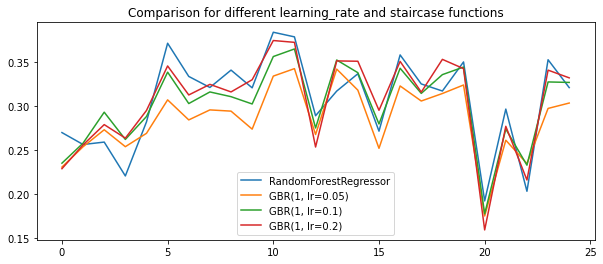

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot([_[0] for _ in scores], label="RandomForestRegressor")
ax.plot([_[1] for _ in scores], label="GBR(1, lr=0.05)")
ax.plot([_[2] for _ in scores], label="GBR(1, lr=0.1)")
ax.plot([_[3] for _ in scores], label="GBR(1, lr=0.2)")
ax.set_title("Comparison for different learning_rate and staircase functions")
ax.legend();

The simpler the underlying model, the higher the *learning_rate* because the simple models do not over-learn.

### Gradient Boosting with other Libraries

A weighted sum of linear regression remains a linear regression. It is impossible to test this scenario with *scikit-learn* since only decision trees are implemented. But there are other libraries that implement gradient boosting.

####  XGBoost

https://xgboost.readthedocs.io/en/latest/build.html#

##### Learning Task Parameters

Specify the learning task and the corresponding learning objective. The objective options are below:

* objective [default=reg:squarederror]

   - reg:squarederror: regression with squared loss.

   - reg:squaredlogerror: regression with squared log loss $1/2[log(pred+1)−log(label+1)]^2$. All input labels are required to be greater than -1. Also, see metric rmsle for possible issue with this objective.

   - reg:logistic: logistic regression

   - binary:logistic: logistic regression for binary classification, output probability

   - binary:logitraw: logistic regression for binary classification, output score before logistic transformation

   - binary:hinge: hinge loss for binary classification. This makes predictions of 0 or 1, rather than producing probabilities.

   - count:poisson –poisson regression for count data, output mean of poisson distribution

      - max_delta_step is set to 0.7 by default in poisson regression (used to safeguard optimization)

   - survival:cox: Cox regression for right censored survival time data (negative values are considered right censored). Note that predictions are returned on the hazard ratio scale (i.e., as HR = exp(marginal_prediction) in the proportional hazard function h(t) = h0(t) * HR).

  - multi:softmax: set XGBoost to do multiclass classification using the softmax objective, you also need to set num_class(number of classes)

  - multi:softprob: same as softmax, but output a vector of ndata * nclass, which can be further reshaped to ndata * nclass matrix. The result contains predicted probability of each data point belonging to each class.

  - rank:pairwise: Use LambdaMART to perform pairwise ranking where the pairwise loss is minimized

  - rank:ndcg: Use LambdaMART to perform list-wise ranking where Normalized Discounted Cumulative Gain (NDCG) is maximized

  - rank:map: Use LambdaMART to perform list-wise ranking where Mean Average Precision (MAP) is maximized

  - reg:gamma: gamma regression with log-link. Output is a mean of gamma distribution. It might be useful, e.g., for modeling insurance claims severity, or for any outcome that might be gamma-distributed.

  - reg:tweedie: Tweedie regression with log-link. It might be useful, e.g., for modeling total loss in insurance, or for any outcome that might be Tweedie-distributed.
```

#### Example of use xgboost

In [156]:
# !pip install xgboost

In [157]:
import xgboost as xgb
# read in data
dtrain = xgb.DMatrix('agaricus.txt.train')
dtest = xgb.DMatrix('agaricus.txt.test')
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)
preds

[14:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.28583017, 0.9239239 , 0.28583017, ..., 0.9239239 , 0.05169873,
       0.9239239 ], dtype=float32)

In [158]:
from xgboost import XGBRegressor

In [159]:
scores = experiment([
    RandomForestRegressor(max_depth=5, n_estimators=100),
    XGBRegressor(max_depth=1, n_estimators=100, learning_rate=0.05),
    XGBRegressor(max_depth=1, n_estimators=100, learning_rate=0.1),
    XGBRegressor(max_depth=1, n_estimators=100, learning_rate=0.2),
])
scores[:2]

100%|██████████| 25/25 [00:13<00:00,  1.87it/s]


[[0.2806108881123429,
  0.2779623707211939,
  0.2838636928400815,
  0.2842632510598284],
 [0.3631559502107151,
  0.3295779150828603,
  0.35350559945936155,
  0.3600597399238965]]

"Comparison for different learning_rate \ net of staircase functions"
             "with XGBoost"

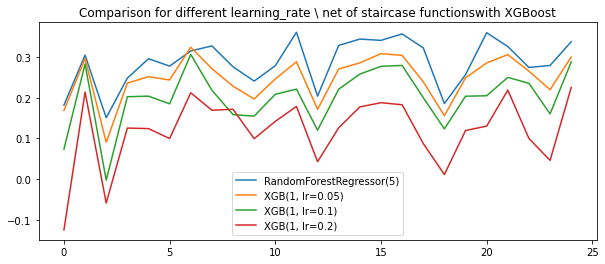

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot([_[0] for _ in scores], label="RandomForestRegressor(5)")
ax.plot([_[1] for _ in scores], label="XGB(1, lr=0.05)")
ax.plot([_[2] for _ in scores], label="XGB(1, lr=0.1)")
ax.plot([_[3] for _ in scores], label="XGB(1, lr=0.2)")
ax.set_title("Comparison for different learning_rate \ net of staircase functions" "with XGBoost")
ax.legend();

The results are pretty much the same.

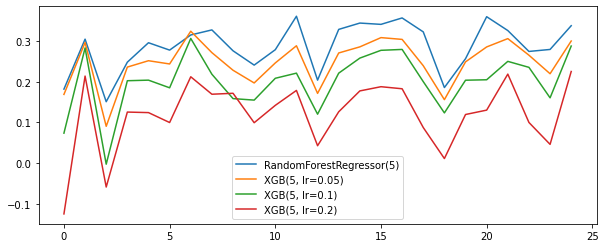

In [168]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot([_[0] for _ in scores], label="RandomForestRegressor(5)")
ax.plot([_[1] for _ in scores], label="XGB(5, lr=0.05)")
ax.plot([_[2] for _ in scores], label="XGB(5, lr=0.1)")
ax.plot([_[3] for _ in scores], label="XGB(5, lr=0.2)")

ax.legend();

####  LightGBM

In [169]:
# !pip install lightgbm

In [170]:
from lightgbm import LGBMRegressor

In [171]:
scores = experiment([
    RandomForestRegressor(max_depth=5, n_estimators=100),
    LGBMRegressor(max_depth=1, n_estimators=100, learning_rate=0.05),
    LGBMRegressor(max_depth=1, n_estimators=100, learning_rate=0.1),
    LGBMRegressor(max_depth=1, n_estimators=100, learning_rate=0.2),
])
scores[:2]

100%|██████████| 25/25 [00:08<00:00,  2.86it/s]


[[0.2580129625409966,
  0.2697769809131183,
  0.2946988025399774,
  0.2985044440949869],
 [0.26434561362848097,
  0.24281559171366973,
  0.2578254251035983,
  0.25873380223687137]]

"Comparison for different learning_rate \ net of staircase functions"
             "with LightGBM"

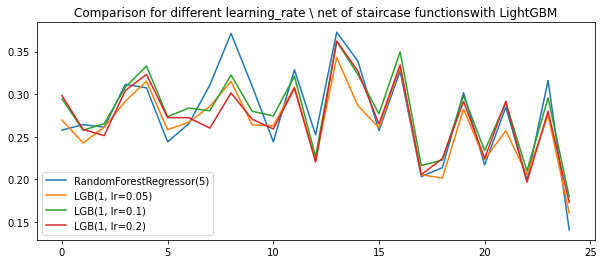

In [172]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot([_[0] for _ in scores], label="RandomForestRegressor(5)")
ax.plot([_[1] for _ in scores], label="LGB(1, lr=0.05)")
ax.plot([_[2] for _ in scores], label="LGB(1, lr=0.1)")
ax.plot([_[3] for _ in scores], label="LGB(1, lr=0.2)")
ax.set_title("Comparison for different learning_rate \ net of staircase functions"
"with LightGBM")
ax.legend();

In [173]:
scores = experiment([
    RandomForestRegressor(max_depth=5, n_estimators=100),
    LGBMRegressor(max_depth=5, n_estimators=100, learning_rate=0.05),
    LGBMRegressor(max_depth=5, n_estimators=100, learning_rate=0.1),
    LGBMRegressor(max_depth=5, n_estimators=100, learning_rate=0.2),
])
scores[:2]

100%|██████████| 25/25 [00:10<00:00,  2.33it/s]


[[0.16086886723845972,
  0.1411641996699594,
  0.0753416338518601,
  -0.025269470347593526],
 [0.3588313532183244,
  0.31315619856045784,
  0.26309085102801566,
  0.16441981064105626]]

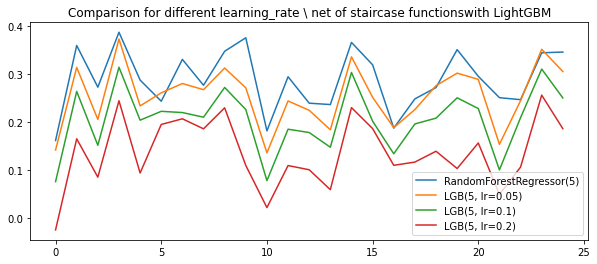

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot([_[0] for _ in scores], label="RandomForestRegressor(5)")
ax.plot([_[1] for _ in scores], label="LGB(5, lr=0.05)")
ax.plot([_[2] for _ in scores], label="LGB(5, lr=0.1)")
ax.plot([_[3] for _ in scores], label="LGB(5, lr=0.2)")
ax.set_title("Comparison for different learning_rate \ net of staircase functions"
"with LightGBM")
ax.legend();

[LightGBM](https://lightgbm.readthedocs.io/en/latest/) paraît moins sensible au *learning_rate* que [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html).

[LightGBM](https://lightgbm.readthedocs.io/en/latest/) seems less sensitive to *learning_rate* than [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html).

#### CatBoost

[CatBoost](https://catboost.ai/) is one of the most recent. It is supposed to be more effective for categories which is not the case here.

In [175]:
# !pip install catboost

In [176]:
from catboost import CatBoostRegressor

In [177]:
scores = experiment([
    RandomForestRegressor(max_depth=5, n_estimators=100),
    CatBoostRegressor(max_depth=1, n_estimators=100, learning_rate=0.05, verbose=False),
    CatBoostRegressor(max_depth=1, n_estimators=100, learning_rate=0.1, verbose=False),
    CatBoostRegressor(max_depth=1, n_estimators=100, learning_rate=0.2, verbose=False),
])
scores[:2]

100%|██████████| 25/25 [00:15<00:00,  1.65it/s]


[[0.15784560938159176,
  0.1896625489101209,
  0.20649890445721408,
  0.19718742816032175],
 [0.297205636112001,
  0.2946873426412401,
  0.3133181273607606,
  0.32431881411499097]]

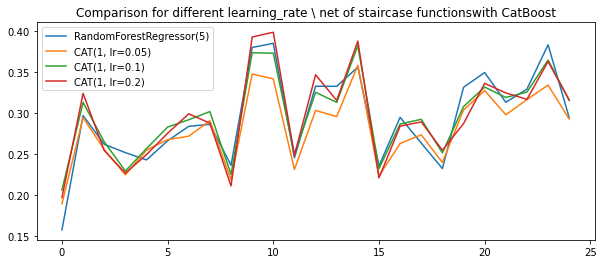

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot([_[0] for _ in scores], label="RandomForestRegressor(5)")
ax.plot([_[1] for _ in scores], label="CAT(1, lr=0.05)")
ax.plot([_[2] for _ in scores], label="CAT(1, lr=0.1)")
ax.plot([_[3] for _ in scores], label="CAT(1, lr=0.2)")
ax.set_title("Comparison for different learning_rate \ net of staircase functions"
"with CatBoost")
ax.legend();

In [179]:
scores = experiment([
    RandomForestRegressor(max_depth=5, n_estimators=100),
    CatBoostRegressor(max_depth=5, n_estimators=100, learning_rate=0.05, verbose=False),
    CatBoostRegressor(max_depth=5, n_estimators=100, learning_rate=0.1, verbose=False),
    CatBoostRegressor(max_depth=5, n_estimators=100, learning_rate=0.2, verbose=False),
])
scores[:2]

100%|██████████| 25/25 [00:24<00:00,  1.02it/s]


[[0.3156339958405664,
  0.3359439615813272,
  0.32009156046483767,
  0.2732774613121939],
 [0.17551103141247137,
  0.18876253088147954,
  0.18927861858080897,
  0.10926980048281554]]

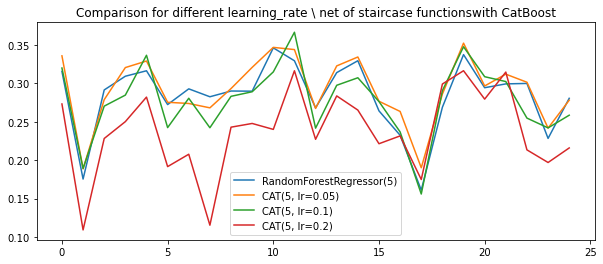

In [180]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot([_[0] for _ in scores], label="RandomForestRegressor(5)")
ax.plot([_[1] for _ in scores], label="CAT(5, lr=0.05)")
ax.plot([_[2] for _ in scores], label="CAT(5, lr=0.1)")
ax.plot([_[3] for _ in scores], label="CAT(5, lr=0.2)")
ax.set_title("Comparison for different learning_rate \ net of staircase functions"
"with CatBoost")
ax.legend();